STEP 01 : IMPORTING DATA

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
fashion_train_df = pd.read_csv('input/fashion-mnist_train.csv', sep = ',')

In [125]:
fashion_test_df = pd.read_csv('input/fashion-mnist_test.csv', sep = ',')

STEP 02 VISUALIZATION OF DATASET

In [126]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [128]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [130]:
training = np.array(fashion_train_df, dtype = 'float32')

In [131]:
testing = np.array(fashion_test_df, dtype = 'float32')
testing

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

3.0

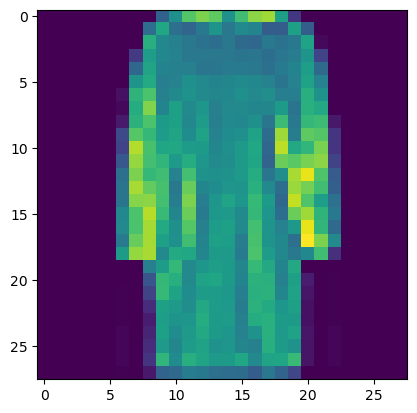

In [132]:
import random
i = random.randint(0,6000)
plt.imshow(training[i,1:].reshape(28,28))
label = training[i,0]
label

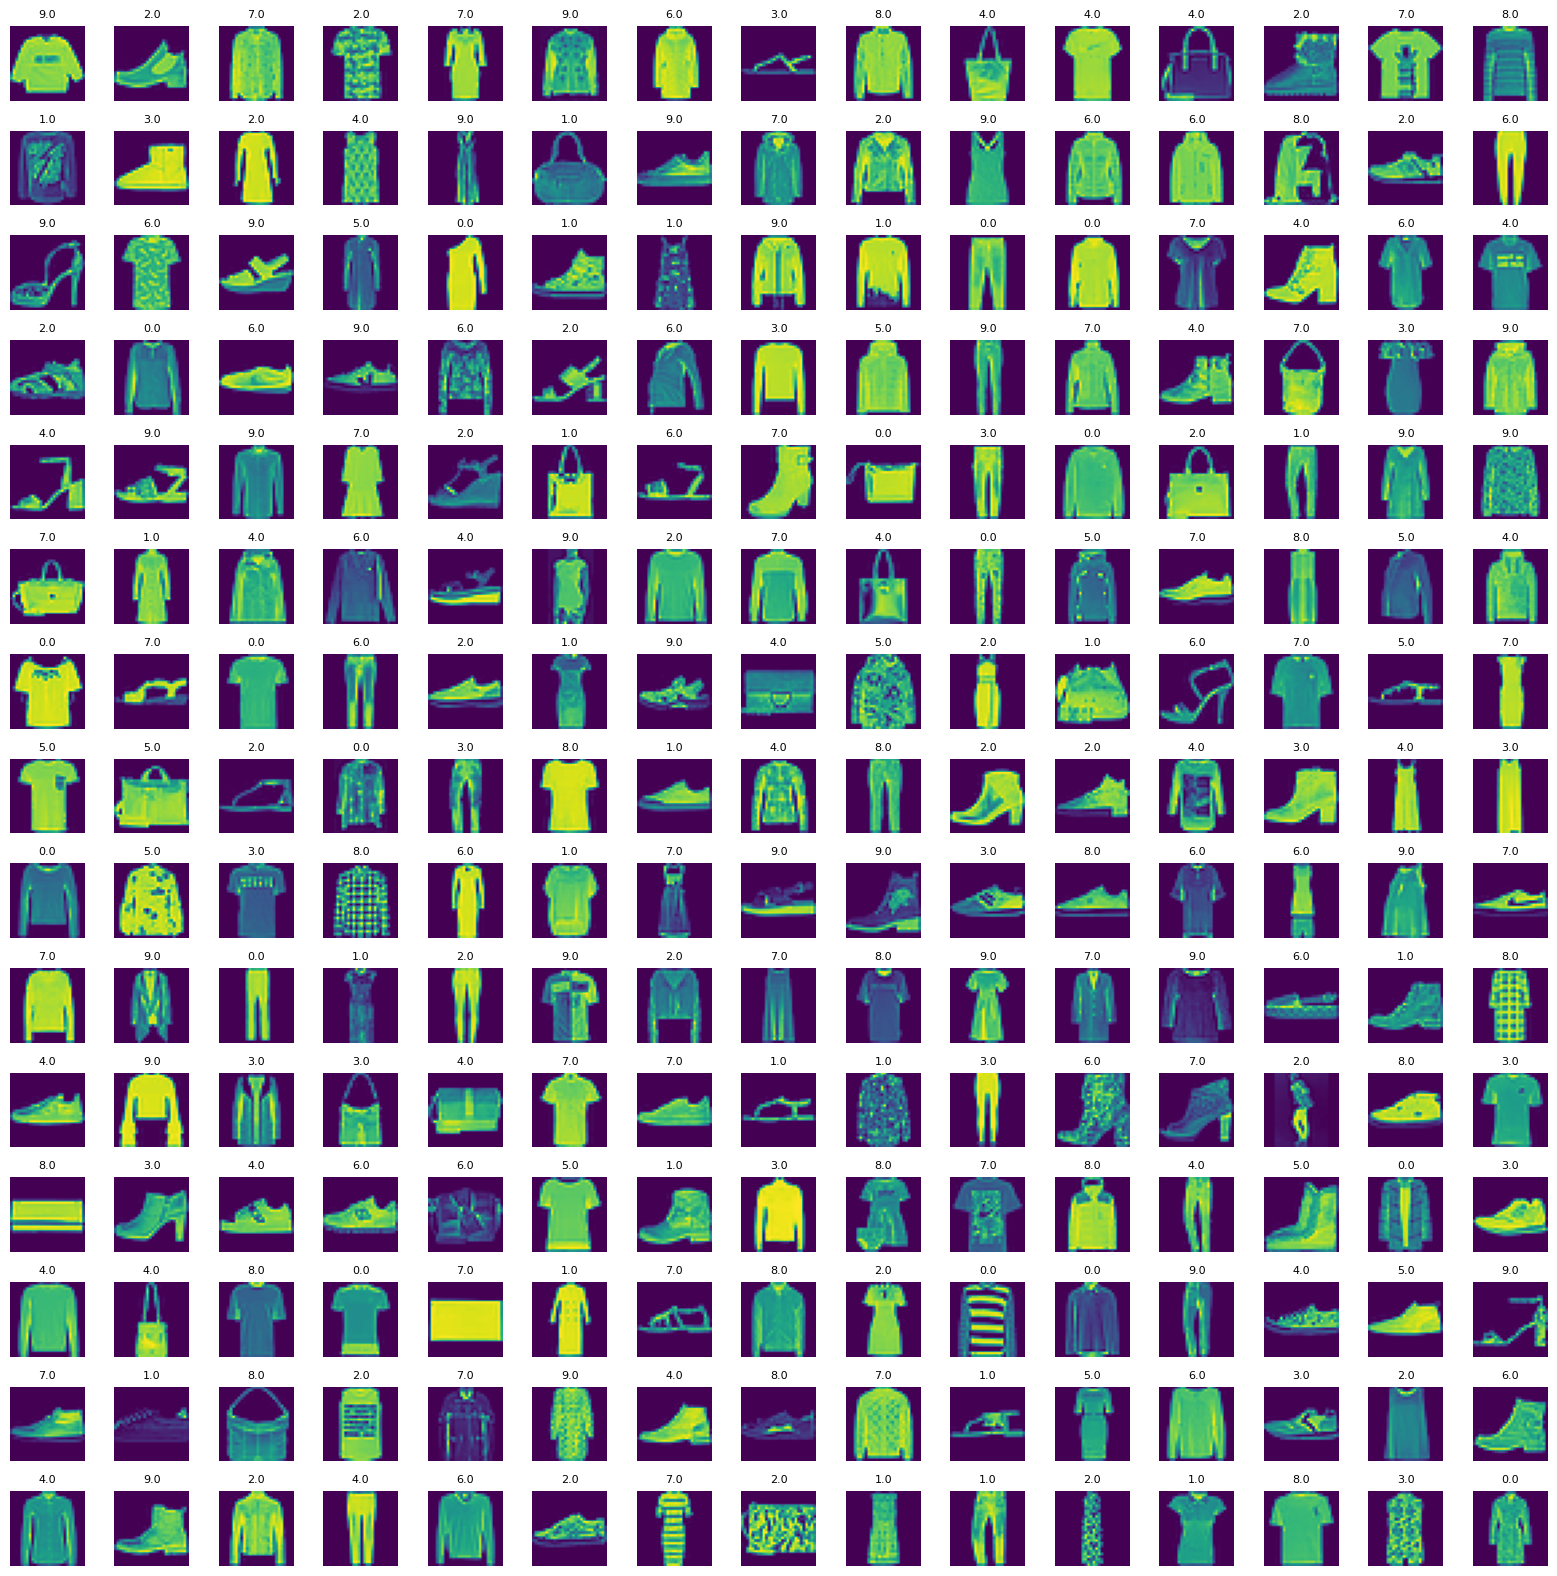

In [133]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (20,20))

axes = axes.ravel() #flatten the 25*25 matrix into 225 array

n_training = len(training)

for i in np.arange(0, L_grid*W_grid):
    index = random.randint(0, n_training)
    axes[i].imshow(training[i,1:].reshape(28,28))
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

STEP 03: MODEL TRAINING

In [134]:
X_train = training[:, 1:]/255
y_train = training[:, 0]

In [135]:
X_test = testing[:, 1:]/255
y_test = testing[:, 0]

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [138]:
X_train.shape

(48000, 784)

In [139]:
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))

In [140]:
X_train.shape

(48000, 28, 28, 1)

In [141]:
X_validate.shape

(12000, 28, 28, 1)

In [142]:
X_test.shape

(10000, 28, 28, 1)

In [143]:
!pip install keras
!pip install tensorflow

In [144]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [145]:
cnn_model = Sequential()

In [146]:
cnn_model.add(Conv2D(64, 3, 3, input_shape = (28,28,1), activation = 'relu'))

In [147]:
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

In [148]:
cnn_model.add(Flatten())

In [149]:
cnn_model.add(Dense(32, activation = 'relu' ,))

In [150]:
cnn_model.add(Dense(10, activation = 'sigmoid'))

In [151]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', 
                  optimizer = Adam(learning_rate = 0.001, beta_1 = 0.7, beta_2 = 0.7), metrics = ['accuracy'])

In [152]:
epochs = 50

In [153]:
cnn_model.fit(X_train, y_train, batch_size = 512, epochs = epochs, verbose = 1, validation_data = (X_validate, y_validate))

Epoch 1/50
94/94 [==============================] - 4s 28ms/step - loss: 1.4298 - accuracy: 0.5807 - val_loss: 0.8010 - val_accuracy: 0.7247
Epoch 2/50
94/94 [==============================] - 2s 24ms/step - loss: 0.7007 - accuracy: 0.7481 - val_loss: 0.6363 - val_accuracy: 0.7660
Epoch 3/50
94/94 [==============================] - 2s 24ms/step - loss: 0.6050 - accuracy: 0.7783 - val_loss: 0.5814 - val_accuracy: 0.7883
Epoch 4/50
94/94 [==============================] - 2s 26ms/step - loss: 0.5555 - accuracy: 0.7974 - val_loss: 0.5356 - val_accuracy: 0.8072
Epoch 5/50
94/94 [==============================] - 3s 27ms/step - loss: 0.5212 - accuracy: 0.8090 - val_loss: 0.5144 - val_accuracy: 0.8117
Epoch 6/50
94/94 [==============================] - 2s 25ms/step - loss: 0.4970 - accuracy: 0.8196 - val_loss: 0.4918 - val_accuracy: 0.8222
Epoch 7/50
94/94 [==============================] - 3s 27ms/step - loss: 0.4778 - accuracy: 0.8247 - val_loss: 0.4742 - val_accuracy: 0.8296
Epoch 8/50
94

STEP 04: EVALUATION THE MODEL

In [154]:
evaluation = cnn_model.evaluate(X_test, y_test)
print("Test accuracy: {:.3f}".format(evaluation[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.3437 - accuracy: 0.8772
Test accuracy: 0.877


In [155]:
predicted_classes = cnn_model.predict(X_test)
predicted_classes = np.argmax(predicted_classes, axis=1)
predicted_classes

313/313 [==============================] - 1s 3ms/step


array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

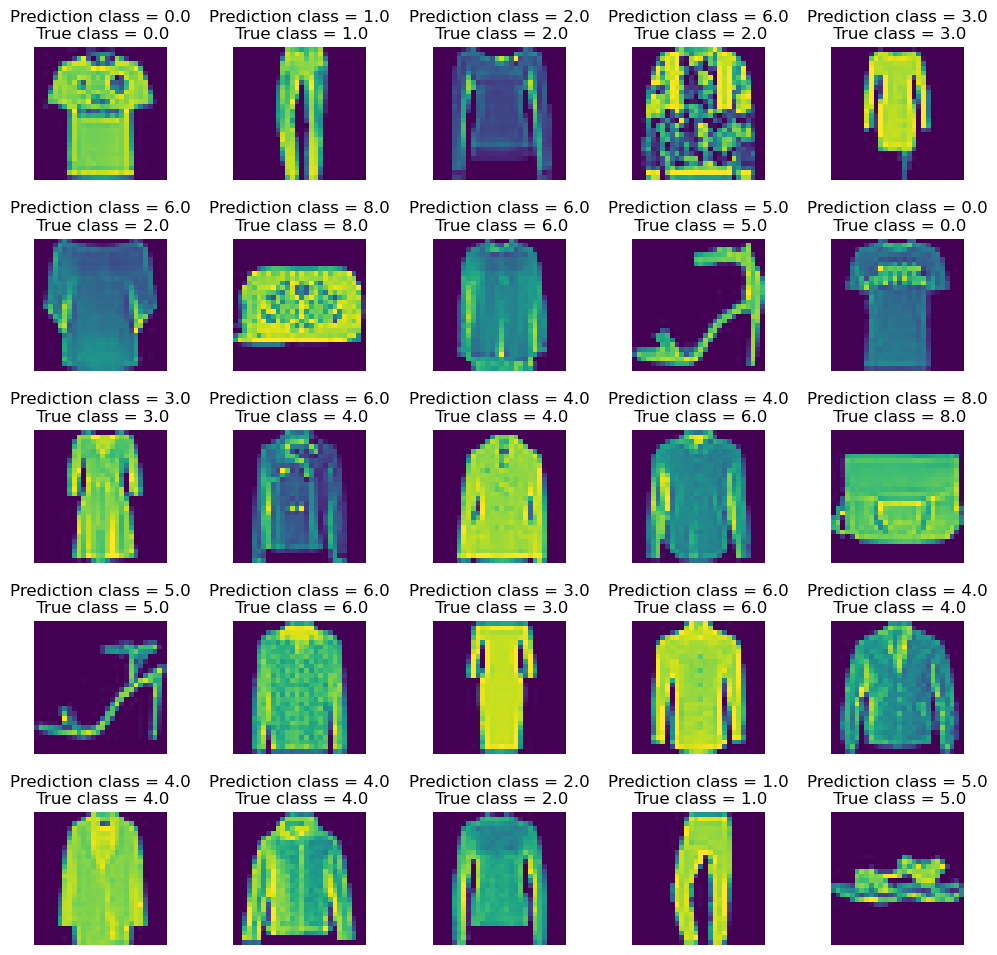

In [156]:
L = 5
W = 5
fig, axes = plt.subplots(L,W,figsize = (12,12))
axes = axes.ravel()
for i in range(0,L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction class = {:0.1f}\n True class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

In [157]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)

<Axes: >

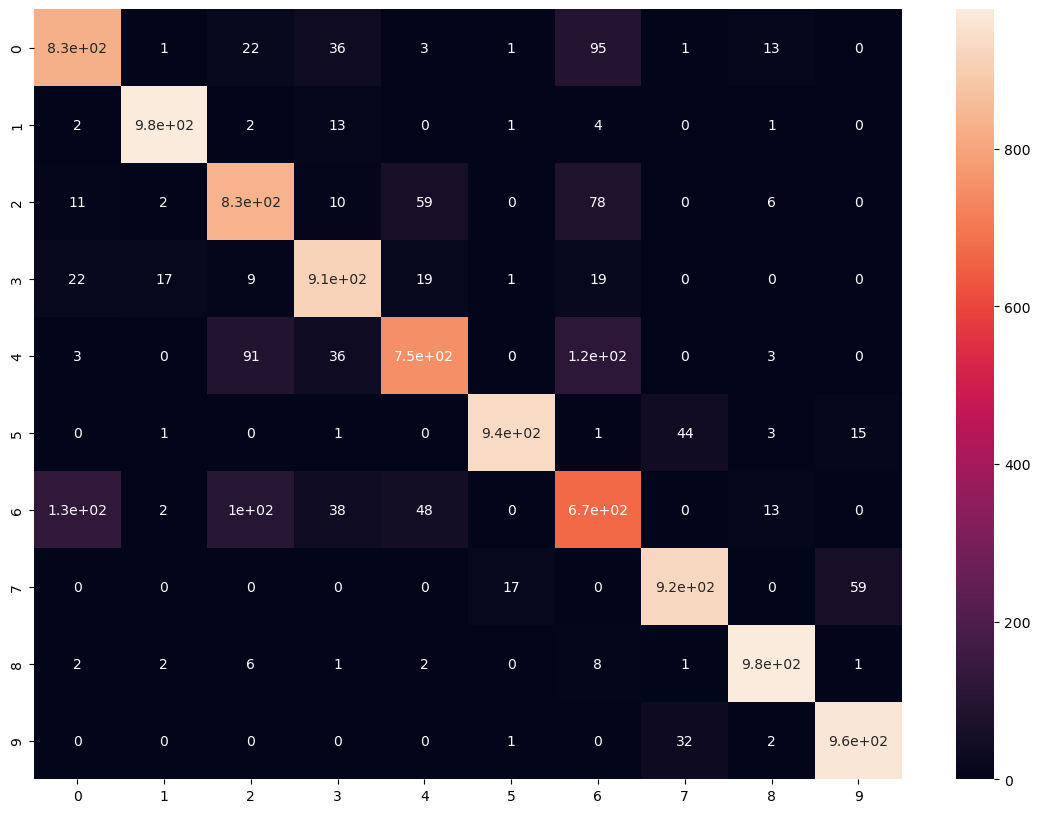

In [158]:
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot = True)

In [159]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.83      0.83      0.83      1000
     Class 1       0.98      0.98      0.98      1000
     Class 2       0.78      0.83      0.81      1000
     Class 3       0.87      0.91      0.89      1000
     Class 4       0.85      0.75      0.80      1000
     Class 5       0.98      0.94      0.96      1000
     Class 6       0.68      0.67      0.67      1000
     Class 7       0.92      0.92      0.92      1000
     Class 8       0.96      0.98      0.97      1000
     Class 9       0.93      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

